In [27]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [29]:
tf.__version__

'2.2.0'

In [30]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [31]:
!ls "/content/gdrive/My Drive/classification-regression/"

datasets_11167_15520_test.csv  datasets_11167_15520_train.csv


In [32]:
PATH = "/content/gdrive/My Drive/classification-regression/"

In [33]:
os.listdir(PATH)

['datasets_11167_15520_train.csv', 'datasets_11167_15520_test.csv']

In [34]:
train_dir = os.path.join(PATH,'datasets_11167_15520_train.csv')
test_dir = os.path.join(PATH,'datasets_11167_15520_test.csv')

In [35]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

In [36]:
train_df.head(20) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
617,1109,1,2.7,1,1,0,39,0.4,98,1,9,1391,1787,1524,15,10,7,1,1,1,1
412,1478,1,0.8,1,12,0,48,0.7,99,5,17,694,882,1141,5,2,6,0,0,1,1
1321,1965,1,0.5,0,4,1,29,0.5,149,5,13,584,676,2973,11,1,20,1,1,1,3
920,934,0,2.0,1,2,0,30,0.7,182,8,15,521,1190,703,10,8,7,0,0,1,0
974,672,1,0.5,1,0,0,54,0.9,95,4,11,578,1143,667,17,8,14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1898,0,1.8,1,3,1,56,0.2,185,7,4,444,739,2114,10,5,19,1,1,1,2
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1489,772,1,1.2,1,7,1,8,0.6,134,7,8,552,1802,422,7,6,15,1,0,0,0
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1,1


In [12]:
print(train_df.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
                ..
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
Length: 21, dtype: int64


In [37]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std
train_df_norm['blue'] = train_df['blue']
train_df_norm['dual_sim'] = train_df['dual_sim']
train_df_norm['four_g'] = train_df['four_g']
train_df_norm['three_g'] = train_df['three_g']
train_df_norm['touch_screen'] = train_df['touch_screen']
train_df_norm['wifi'] = train_df['wifi']
train_df_norm['price_range'] = train_df['price_range']

In [14]:
train_df_norm.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1579,1.1,0,1.3,1,1.1,1,-0.9,0.3,-0.6,0.6,1.7,-1.2,1.4,-0.8,0.9,-0.9,-1.3,1,1,0,1
1997,1.5,0,-0.8,1,-0.8,1,0.2,0.7,-0.9,1.5,-1.1,0.5,0.9,0.9,-0.8,-1.1,-1.1,1,1,0,3
289,-1.4,1,-1.3,1,-1.0,0,0.5,0.3,0.6,0.6,-1.0,-1.2,1.0,0.1,-1.3,-0.4,1.3,0,0,1,1
1386,-1.4,1,0.1,1,1.1,0,1.1,-0.4,-1.4,-0.2,1.5,0.9,0.0,1.2,-0.5,-0.4,0.2,1,1,1,3
911,0.1,1,1.6,1,-1.0,0,-1.2,1.4,0.4,-1.1,0.7,-1.1,-1.7,0.1,0.9,-0.9,-0.4,0,1,1,1


In [15]:
train_df_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,0.0,0.5,-0.0,0.5,0.0,0.5,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.8,0.5,0.5,1.5
std,1.0,0.5,1.0,0.5,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,0.5,1.1
min,-1.7,0.0,-1.3,0.0,-1.0,0.0,-1.7,-1.4,-1.7,-1.5,-1.6,-1.5,-1.7,-1.7,-1.7,-1.3,-1.6,0.0,0.0,0.0,0.0
25%,-0.9,0.0,-1.0,0.0,-0.8,0.0,-0.9,-1.0,-0.9,-0.7,-0.8,-0.8,-0.9,-0.8,-0.8,-0.9,-0.9,1.0,0.0,0.0,0.8
50%,-0.0,0.0,-0.0,1.0,-0.3,1.0,-0.0,-0.0,0.0,-0.2,0.0,-0.2,-0.0,0.0,-0.1,-0.2,-0.0,1.0,1.0,1.0,1.5
75%,0.9,1.0,0.8,1.0,0.6,1.0,0.9,1.0,0.8,1.1,0.8,0.7,0.9,0.9,0.9,0.7,0.9,1.0,1.0,1.0,2.2
max,1.7,1.0,1.8,1.0,3.4,1.0,1.8,1.7,1.7,1.5,1.7,3.0,1.7,1.7,1.6,2.8,1.6,1.0,1.0,1.0,3.0


In [18]:
train_df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1579 to 811
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int64  
 18  touch_

In [19]:
train_df_norm_correlation = train_df

In [22]:
pd.set_option('display.max_rows', None)
train_df_norm_correlation[train_df_norm_correlation.columns[1:]].corr()['price_range'][:]

blue            0.0
clock_speed    -0.0
dual_sim        0.0
fc              0.0
four_g          0.0
int_memory      0.0
m_dep           0.0
mobile_wt      -0.0
n_cores         0.0
pc              0.0
px_height       0.1
px_width        0.2
ram             0.9
sc_h            0.0
sc_w            0.0
talk_time       0.0
three_g         0.0
touch_screen   -0.0
wifi            0.0
price_range     1.0
Name: price_range, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


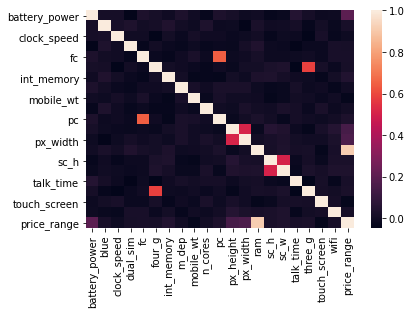

In [23]:
import seaborn as sns
corr = train_df.corr()
sns.heatmap(corr)

In [26]:
print (corr['price_range'].sort_values(ascending=False), '\n')

price_range      1.0
ram              0.9
battery_power    0.2
px_width         0.2
px_height        0.1
int_memory       0.0
sc_w             0.0
pc               0.0
three_g          0.0
sc_h             0.0
fc               0.0
talk_time        0.0
blue             0.0
wifi             0.0
dual_sim         0.0
four_g           0.0
n_cores          0.0
m_dep            0.0
clock_speed     -0.0
mobile_wt       -0.0
touch_screen    -0.0
Name: price_range, dtype: float64 



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [39]:
# Divide data into features X and target (Classes) Y
X = train_df_norm.iloc[:,:-1]
Y = train_df_norm.iloc[:,-1]
#Y = pd.get_dummies(Y)
print(X.shape)
print(Y.shape)

(2000, 20)
(2000,)


In [40]:
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, np.newaxis]).toarray()

In [ ]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)

In [42]:
n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_classes)

4


In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim = n_features, activation = 'relu'))
#model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 804
Trainable params: 804
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

In [50]:
history = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=10,
                                 verbose=1,
                                 validation_data=(X_test, Y_test)
)

Epoch 1/10
320/320 [==============================] - 1s 4ms/step - loss: 1.3094 - accuracy: 0.3512 - val_loss: 1.0168 - val_accuracy: 0.5675
Epoch 2/10
320/320 [==============================] - 1s 3ms/step - loss: 0.8662 - accuracy: 0.6463 - val_loss: 0.6909 - val_accuracy: 0.7725
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.6155 - accuracy: 0.7944 - val_loss: 0.5240 - val_accuracy: 0.8600
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.4715 - accuracy: 0.8687 - val_loss: 0.4152 - val_accuracy: 0.8800
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3806 - accuracy: 0.9069 - val_loss: 0.3451 - val_accuracy: 0.9075
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.9187 - val_loss: 0.2972 - val_accuracy: 0.9150
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2764 - accuracy: 0.9300 - val_loss: 0.2656 - val_accuracy: 0.9250
Epoch 

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20921441912651062
Test accuracy: 0.9375


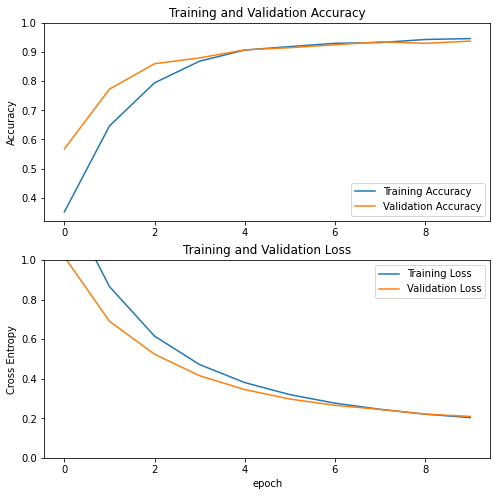

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [53]:
#Y_pred = model.predict(X_test)
Y_pred = np.argmax(model.predict(X_test), axis=-1)
Y_decode = np.argmax(Y_test, axis=1)
print(Y_pred)
print(Y_decode)

[0 1 1 0 2 1 2 2 0 0 0 2 0 2 0 0 3 0 0 2 0 2 0 3 0 2 0 1 0 2 3 1 1 2 0 2 3
 2 1 0 1 0 0 2 3 0 3 0 1 2 2 0 2 0 0 1 0 0 2 0 0 3 2 2 1 1 0 3 1 1 2 1 0 0
 2 0 1 2 1 0 0 2 2 0 0 1 3 3 0 2 3 3 0 3 3 2 1 1 1 3 1 1 0 0 1 2 2 0 0 0 1
 1 0 3 1 1 0 0 3 1 3 1 3 2 3 2 1 2 0 3 0 3 2 2 2 3 0 1 1 2 1 1 0 3 3 2 1 0
 2 3 2 3 2 2 0 0 3 1 1 2 2 3 1 2 3 3 3 2 2 3 1 2 2 0 3 2 3 1 1 1 0 0 0 0 0
 0 2 2 0 0 0 1 2 1 1 0 3 1 3 2 0 1 1 3 2 0 0 1 1 3 0 1 3 0 2 3 2 0 3 2 3 3
 3 1 0 0 3 2 0 0 3 3 2 2 1 2 1 0 0 1 3 3 0 1 3 0 2 0 1 0 3 0 3 0 3 0 3 1 2
 0 2 0 1 3 0 1 3 0 1 0 2 1 0 0 2 0 2 3 0 1 0 2 1 2 3 3 3 2 2 1 2 2 1 3 3 3
 1 2 2 2 0 2 3 1 1 0 2 2 1 0 1 0 2 2 2 1 0 3 0 0 0 2 2 1 1 2 3 3 2 0 1 2 1
 0 0 2 1 1 0 2 0 3 1 1 1 1 3 3 1 1 3 1 3 0 3 0 1 2 0 0 3 1 2 1 3 0 2 0 3 2
 2 1 1 2 3 0 1 3 3 2 1 2 3 2 3 2 3 3 3 2 2 3 0 2 3 3 3 2 0 3]
[0 1 1 0 3 1 2 2 0 0 0 2 0 2 0 0 3 0 0 2 0 2 0 3 0 2 0 1 0 2 3 1 1 2 0 2 3
 2 1 0 1 0 0 2 3 0 3 0 1 2 2 0 2 0 0 1 0 0 2 0 0 3 2 2 1 1 0 3 1 1 2 1 0 0
 3 0 1 2 1 0 1 2 2 0 0 1 3 3 0 2 3 3 0

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Accuracy: 0.937500
Precision: 0.937500
Recall: 0.937500
F1 score: 0.937500
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       115
           1       0.95      0.94      0.94        94
           2       0.88      0.97      0.92        93
           3       0.97      0.89      0.93        98

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



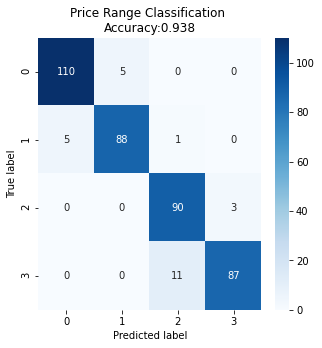

In [56]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy = accuracy_score(Y_decode, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_decode, Y_pred,  average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_decode, Y_pred,  average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_decode, Y_pred, average='micro')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(Y_decode, Y_pred)
#print(matrix)
print(classification_report(Y_decode, Y_pred))

cm_df = pd.DataFrame(matrix,
                     index = ['0','1','2', '3'], 
                     columns = ['0','1','2', '3'])

plt.figure(figsize=(5,5))
sn.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Price Range Classification \nAccuracy:{0:.3f}'.format(accuracy_score(Y_decode, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()